Praktek TF-IDF
=============================

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [3]:
dataset.shape

(902, 10)

In [4]:
dataset.head(3)

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...


In [5]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [6]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [7]:
dataset_label = dataset['Sentimen']

In [8]:
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

# cek distribusi label

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\putma\AppData\Local\Temp\ipykernel_22576\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


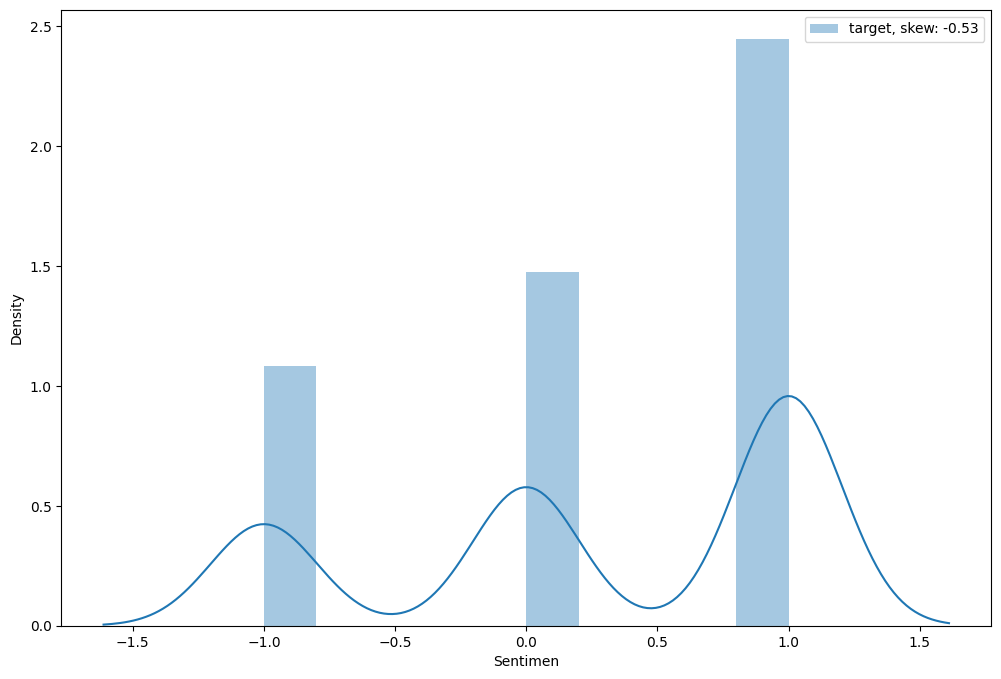

In [10]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [11]:
dataset_label.value_counts()

Sentimen
 1.0    441
 0.0    266
-1.0    195
Name: count, dtype: int64

# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer()

In [14]:
positive_reviews = dataset[(dataset["Sentimen"] == 1)]
negative_reviews = dataset[(dataset["Sentimen"] == -1)]
neutral_reviews = dataset[(dataset["Sentimen"] == 0)]

In [15]:
positive_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
6,6,6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,selamat pagi hari jumat jumat keempat di kala ...,"['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...","['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat empat kala pande...
7,7,7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,hikmah di balik musibah covid smg para pejab...,"['hikmah', 'di', 'balik', 'musibah', 'covid', ...","['hikmah', 'di', 'balik', 'musibah', 'covid', ...",hikmah di balik musibah covid smg para pejabat...,hikmah di balik musibah covid smg para pejabat...,hikmah balik musibah covid smg jabat perintah ...


In [16]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

In [17]:
Positive_tf_idf.shape

(441, 7781)

In [19]:
features = Positive_tf_idf_vect.get_feature_names_out() 

In [20]:
idfValues = Positive_tf_idf_vect.idf_

In [21]:
d = dict(zip(features, 9 - idfValues))

In [22]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [23]:
for i in range(200):
    print(sortedDict[i])

('covid', 7.97247532660991)
('virus', 6.083077387817939)
('cegah', 6.067573201281974)
('sebar', 6.0195639820956135)
('corona', 5.934041808657451)
('moga', 5.878982031474424)
('sama', 5.878982031474424)
('rumah', 5.737331514411396)
('yg', 5.737331514411396)
('wabah', 5.669890233615864)
('semua', 5.597569572036238)
('masyarakat', 5.464038179411716)
('perintah', 5.464038179411716)
('sehat', 5.464038179411716)
('tangan', 5.464038179411716)
('jaga', 5.405197679388782)
('bantu', 5.342677322407448)
('virus corona', 5.342677322407448)
('indonesia', 5.309887499584457)
('laku', 5.309887499584457)
('satu', 5.309887499584457)
('segera', 5.309887499584457)
('wabah covid', 5.309887499584457)
('beri', 5.275985947908776)
('corona covid', 5.275985947908776)
('pandemi', 5.275985947908776)
('sebar covid', 5.275985947908776)
('lawan', 5.2408946280975055)
('jadi', 5.20452698392663)
('hari', 5.166786655943784)
('tetap', 5.166786655943784)
('virus covid', 5.166786655943784)
('ada', 5.127565942790502)
('pande

In [24]:
# !pip3 install wordcloud

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [26]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

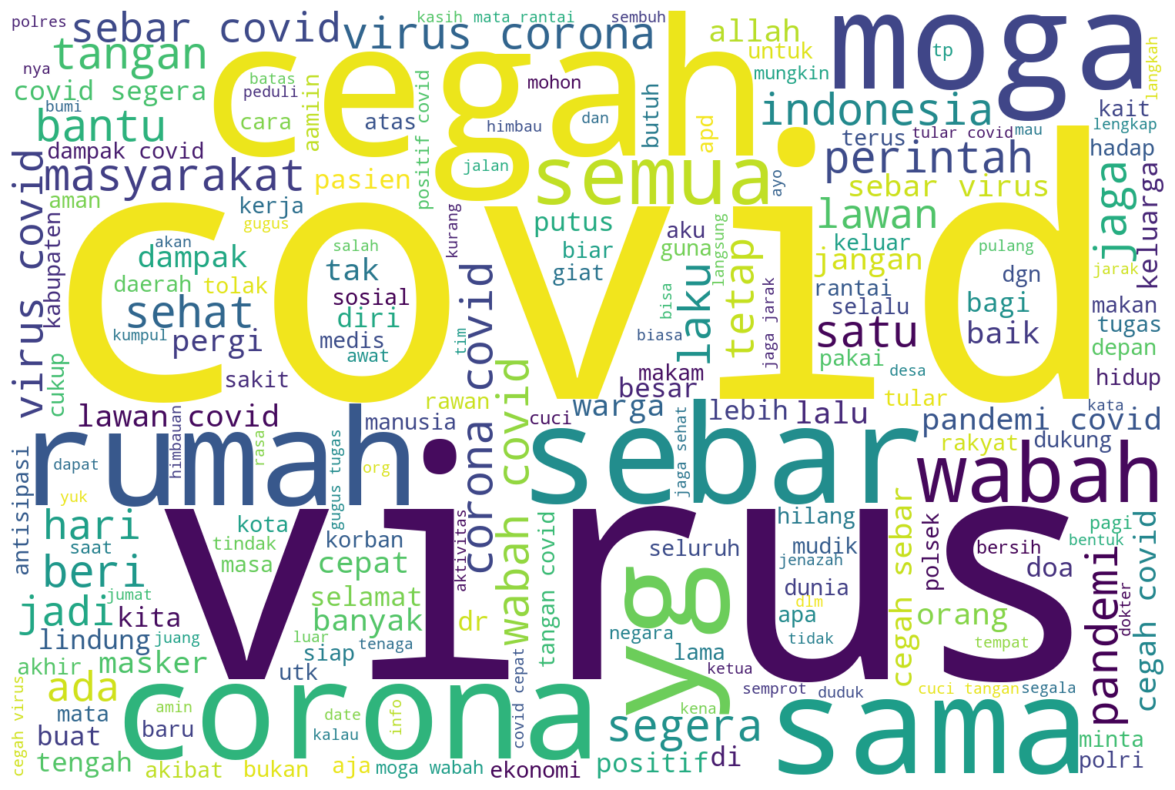

In [27]:
PlotWordCloud(d)

# silakan lakukan untuk netral dan negative

In [28]:
negative_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
4,4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,nyuruh orang pintar lu aja togog itu kerumunan...,"['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...","['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog kerumun orang...
19,19,19,Berita seperti ini tidak akan ditengok oleh Mu...,-1.0,berita seperti ini tidak akan ditengok oleh mu...,"['berita', 'seperti', 'ini', 'tidak', 'akan', ...","['berita', 'seperti', 'ini', 'tidak', 'akan', ...",berita seperti ini tidak akan ditengok oleh mu...,berita seperti ini tidak akan ditengok oleh mu...,berita ini akan tengok muflis dungu berita hoa...
21,21,21,"Temanggung, Jawa Tengah...anggota gugus tugas ...",-1.0,temanggung jawa tengah anggota gugus tugas cov...,"['temanggung', 'jawa', 'tengah', 'anggota', 'g...","['temanggung', 'jawa', 'tengah', 'anggota', 'g...",temanggung jawa tengah anggota gugus tugas cov...,temanggung jawa tengah anggota gugus tugas cov...,tanggung jawa tengah anggota gugus tugas covid...
27,27,27,COVID-19 Telah Bermutasi? Ada Gelombang Kedua ...,-1.0,covid telah bermutasi ada gelombang kedua vi...,"['covid', 'telah', 'bermutasi', 'ada', 'gelomb...","['covid', 'telah', 'bermutasi', 'ada', 'gelomb...",covid telah bermutasi ada gelombang kedua viru...,covid telah bermutasi ada gelombang kedua viru...,covid mutasi gelombang dua virus corona
31,31,31,"Berarti dah lama gak gitaran, mungkin mau biki...",-1.0,berarti dah lama gak gitaran mungkin mau bikin...,"['berarti', 'dah', 'lama', 'gak', 'gitaran', '...","['berarti', 'dah', 'lama', 'gak', 'gitaran', '...",berarti dah lama gak gitaran mungkin mau bikin...,berarti dah lama gak gitaran mungkin mau bikin...,arti dah lama gak gitar mungkin mau bikin albu...


In [29]:
Negative_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Negative_tf_idf = Negative_tf_idf_vect.fit_transform(negative_reviews["ProcessedText"].values)

In [30]:
Negative_tf_idf.shape

(195, 4174)

In [31]:
features = Negative_tf_idf_vect.get_feature_names_out() 

In [32]:
idfValues = Negative_tf_idf_vect.idf_

In [33]:
d_negative = dict(zip(features, 9 - idfValues))

In [34]:
sortedDict = sorted(d_negative.items(), key = lambda d_negative: d_negative[1], reverse = True)

In [35]:
for i in range(200):
    print(sortedDict[i])

('covid', 7.963632355829125)
('yg', 6.593086351677374)
('jadi', 5.940761165637683)
('orang', 5.8999391711174285)
('semua', 5.717617614323474)
('bukan', 5.666324319935923)
('kena', 5.612257098665648)
('jenazah', 5.555098684825699)
('mau', 5.555098684825699)
('sama', 5.494474063009264)
('tinggal', 5.494474063009264)
('virus', 5.494474063009264)
('mati', 5.360942670384741)
('rumah', 5.360942670384741)
('tolak', 5.360942670384741)
('aja', 5.2868346982310195)
('apa', 5.2868346982310195)
('buat', 5.2868346982310195)
('ga', 5.2868346982310195)
('kalo', 5.206791990557483)
('lebih', 5.206791990557483)
('pandemi', 5.206791990557483)
('tak', 5.206791990557483)
('corona', 5.119780613567853)
('lama', 5.119780613567853)
('masuk', 5.119780613567853)
('wabah', 5.119780613567853)
('berita', 5.024470433763528)
('biar', 5.024470433763528)
('gak', 5.024470433763528)
('medis', 5.024470433763528)
('negara', 5.024470433763528)
('ni', 5.024470433763528)
('pasien', 5.024470433763528)
('perintah', 5.02447043376

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [37]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

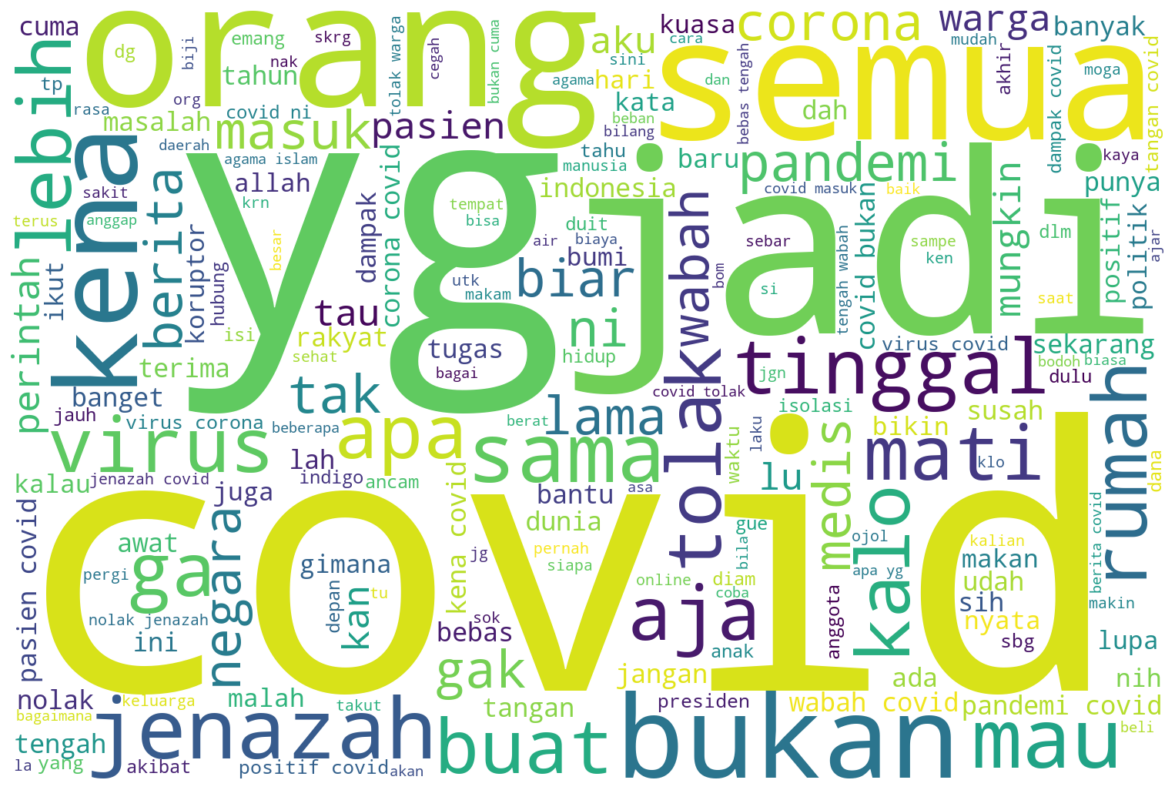

In [38]:
PlotWordCloud(d_negative)

In [39]:
neutral_reviews.head()

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
3,3,3,Covid belum nyampe prigen mbak hmm hoax,0.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak hmm hoax,covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
5,5,5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,0.0,pikir balik byk mnde plk nk setelkn lepas covid,"['pikir', 'balik', 'byk', 'mnde', 'plk', 'nk',...","['pikir', 'balik', 'byk', 'mnde', 'plk', 'nk',...",pikir balik byk mnde plk nk setelkn lepas covid,pikir balik byk mnde plk nk setelkn lepas covid,pikir balik byk mnde plk nk setelkn lepas covid
22,22,22,Profil Operasional Bandara AP II di Tengah Pan...,0.0,profil operasional bandara ap ii di tengah pan...,"['profil', 'operasional', 'bandara', 'ap', 'ii...","['profil', 'operasional', 'bandara', 'ap', 'ii...",profil operasional bandara ap ii di tengah pan...,profil operasional bandara ap ii di tengah pan...,profil operasional bandara ap ii tengah pandem...
23,23,23,Btw long weekend ni pada mau kemana... Dulu se...,0.0,btw long weekend ni pada mau kemana dulu sebel...,"['btw', 'long', 'weekend', 'ni', 'pada', 'mau'...","['btw', 'long', 'weekend', 'ni', 'pada', 'mau'...",btw long weekend ni pada mau kemana dulu sebel...,btw long weekend ni pada mau kemana dulu sebel...,btw long weekend ni mau dulu ada nya si covid ...
30,30,30,Ada yang kek gue saking fokus sama berita soal...,0.0,ada yang kek gue saking fokus sama berita soal...,"['ada', 'yang', 'kek', 'gue', 'saking', 'fokus...","['ada', 'yang', 'kek', 'gue', 'saking', 'fokus...",ada yang kek gue saking fokus sama berita soal...,ada yang kek gue saking fokus sama berita soal...,yang kek gue saking fokus sama berita soal cov...


In [40]:
Neutral_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Neutral_tf_idf = Neutral_tf_idf_vect.fit_transform(neutral_reviews["ProcessedText"].values)

In [41]:
Neutral_tf_idf.shape

(266, 5154)

In [42]:
features = Neutral_tf_idf_vect.get_feature_names_out()

In [43]:
idfValues = Neutral_tf_idf_vect.idf_

In [44]:
d_neutral = dict(zip(features, 9 - idfValues))

sortedDict_neutral = sorted(d_neutral.items(), key = lambda d_neutral: d_neutral[1], reverse = True)

In [45]:
for i in range(200):
    print(sortedDict_neutral[i])

('covid', 7.96182742649497)
('yg', 6.101630795713687)
('orang', 5.5908051719476966)
('positif', 5.5482455575289)
('date', 5.408483615153742)
('hari', 5.408483615153742)
('indonesia', 5.3571903207661915)
('ni', 5.3571903207661915)
('ada', 5.303123099495915)
('mau', 5.303123099495915)
('pasien', 5.303123099495915)
('baru', 5.2459646856559665)
('jadi', 5.2459646856559665)
('virus', 5.2459646856559665)
('banyak', 5.185340063839531)
('lebih', 5.185340063839531)
('kasus', 5.12080154270196)
('positif covid', 5.12080154270196)
('tinggal', 5.12080154270196)
('kena', 5.051808671215009)
('pandemi', 5.051808671215009)
('update', 5.051808671215009)
('apa', 4.9777006990612875)
('rumah', 4.9777006990612875)
('buat', 4.897657991387751)
('bukan', 4.897657991387751)
('dgn', 4.897657991387751)
('di', 4.897657991387751)
('ga', 4.897657991387751)
('kalo', 4.897657991387751)
('pandemi covid', 4.897657991387751)
('sakit', 4.897657991387751)
('sebar', 4.897657991387751)
('tak', 4.897657991387751)
('tambah', 4

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

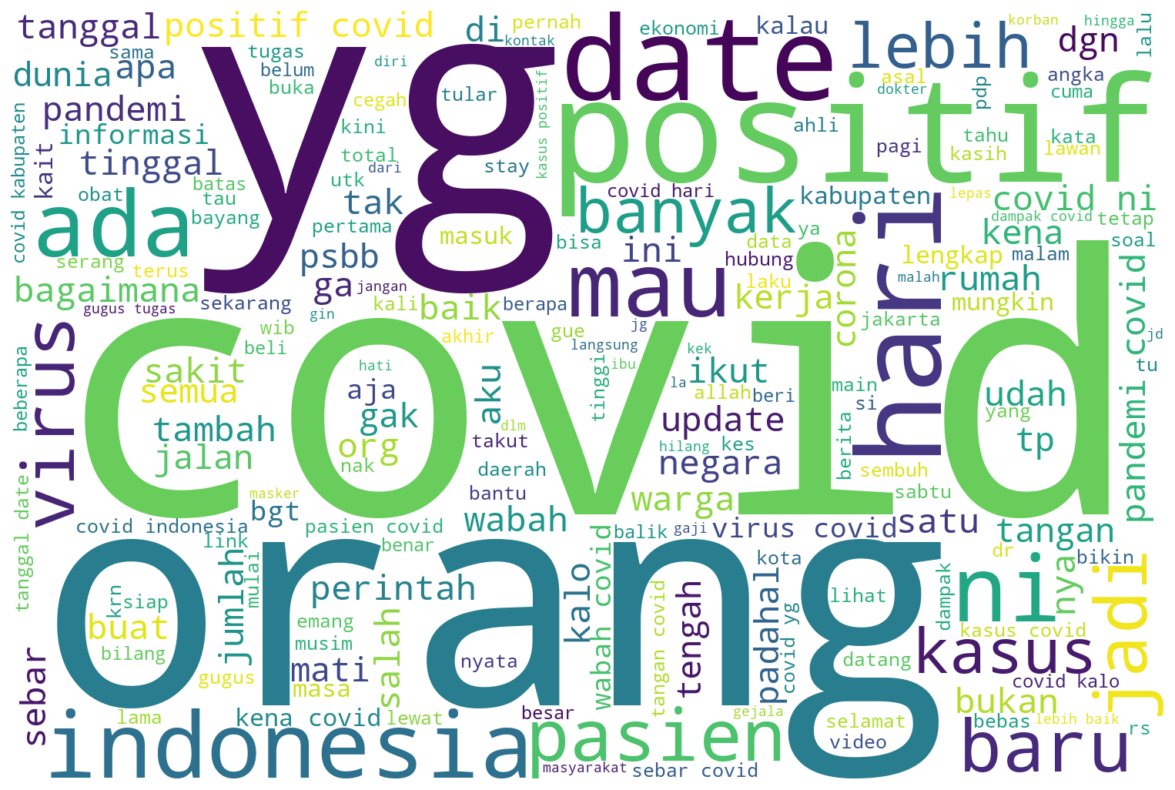

In [47]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

PlotWordCloud(d_neutral)